# **W12.G2 - Time Series forecasting with LSTMs**

Contents.


1. Introduction
*   Time series forecasting
*   LSTM

2. Step forecasting wiht LSTMs
    * Data Preparation
    * Model Architecture
    * Training and Evaluation

3. Example Time series forecasting with LSTMs



# 1. Introduction

**Time series forecasting** : Statistical technique use to analyze historical data points and predict future values based on temporal patterns.
*   useful for identifying trends, seasonality, and cyclical behaviours that support strategic planning.
* Application: stock market movements, forecasting energy demand, optimizing inventory management
*   Accurate time series analysis helps organizations allocate resources efficiently and reduce operational risks

Methods:

1. **Autoregressive Integrated Moving Average (ARIMA)**: A simple and popular method that uses past values to make predictions
2. **Exponential Smoothing Time Series (ETS)**: This method looks at trends and patterns over time to give better forecasts
3. **Long Short-Term Memory (LSTM)**: A more advanced method that uses deep learning to understand complex data patterns


When do we need advanced models like LSTM?
* When the dataset has complex, nonlinear temporal patterns and multiple correlated variables (multivariate)
* When long-term dependencies influence future values
* When traditional models (ARIMA, ETS, etc.) fail to capture dynamics



# Long Short-Term Memory (LSTM)
* Type of recurrent neural network architecture designed to handle the information that happens in order.
* Addresses the vanishing gradient problem common in RNNs
* Uses memory cells to store information
* includes input, forget and output gates
* Selectively remembers or forgets information across time steps
* Captures non-linear and complex temporal patterns, handles long-range dependencies effectively and is robuts to noise and irregular patterns



## 2. Steps in forecasting with LSTMs
- Data preparation
- Model architechture
- Training and evaluation


### Data preparation
- Clean
- Split
  - LSTMs need consequtive data
  - Train on the past to predict the future
- Select features
- Scale
- Create sequences
  - Window size


### Sequence generation example
Original series:  [x1, x2, x3, x4, x5, x6, x7]

Window size (n): 3

Sequences:

Input → Target

[x1, x2, x3] → x4

[x2, x3, x4] → x5

[x3, x4, x5] → x6

[x4, x5, x6] → x7

### Decide on Model Architecture
- Number of Units / Hidden size
- Layers
- Regularization: L1/L2, dropout, early stopping
- Loss function
- Forecating strategy: Multistep (direct) vs Rolling/Recursive

### Training, Validation and Evaluation
- Metrics: RMSE, MAE, MAPE.
- Visualizations:
  - Training vs validation loss curves.
  - Predictions vs actual values.


- Hyperparameter tuning

# **3. Example Time series forecasting with LSTMs(include regularization)**

[LSTM example usings a synthetic non-linear dataset]


The synthetic dataset is an artificially generated time-series designed specifically to test and demonstrate the ability of LSTM neural networks to model non-linear, temporally dependent dynamics. The dataset mimics a 15-minute–resolution HVAC signal (e.g., SUPPLY RH), but with controlled non-linear relationships that traditional linear models cannot capture.

   Time     feat1     feat2     feat3  SUPPLY RH
0  0.00  0.049671  0.799095  0.932151    52.6958
1  0.25  0.017584  0.835927  0.968443    52.6958
2  0.50  0.127559  0.736069  0.936236    52.6958
3  0.75  0.246411  0.911343  1.001992    52.6958
4  1.00  0.101918  1.040532  1.103647    52.6958
Synthetic data shape: (5000, 5)
Feature shape (scaled): (5000, 4)
Target shape (scaled) : (5000, 1)
X_seq: (4968, 32, 4) y_seq: (4968,)
Train: 3478 Val: 745 Test: 745


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0788 - mae: 0.2265 - val_loss: 0.0302 - val_mae: 0.1360
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0335 - mae: 0.1501 - val_loss: 0.0265 - val_mae: 0.1323
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0298 - mae: 0.1411 - val_loss: 0.0177 - val_mae: 0.1087
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0201 - mae: 0.1133 - val_loss: 0.0058 - val_mae: 0.0602
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mae: 0.0803 - val_loss: 0.0068 - val_mae: 0.0661
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0105 - mae: 0.0811 - val_loss: 0.0050 - val_mae: 0.0552
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0084 - mae: 0.0728 - val_loss: 0.0053 - val_mae: 0.0571
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0088 - mae: 0.0746 - val_loss: 0.0045 - val_mae: 0.0531
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.008

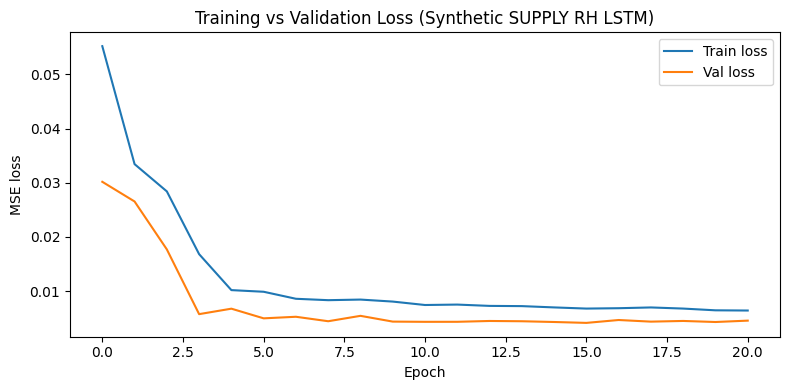

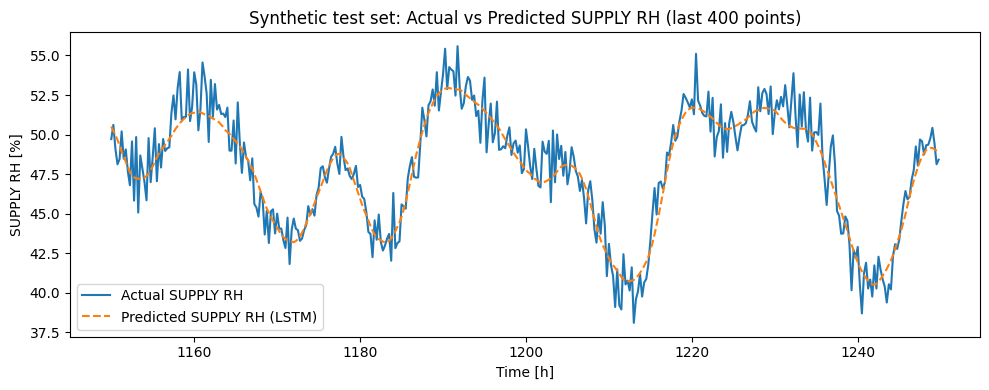

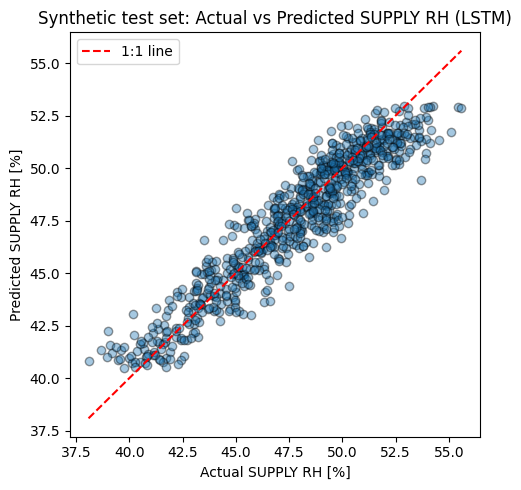

In [ ]:
# Synthetic example where LSTM beats Persistence + Linear Regression
# Just run this cell in Colab.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# ============================================================
# 1. SYNTHETIC DATA
# ============================================================

N_STEPS = 5000           # length of time series
DT_HOURS = 0.25          # 15 min resolution
LOOKBACK = 32            # ~8 h window
TEST_FRACTION = 0.15
VAL_FRACTION  = 0.15
BATCH_SIZE    = 64
EPOCHS        = 50

np.random.seed(42)

# Time axis (in hours)
time = np.arange(N_STEPS) * DT_HOURS

# Base oscillatory signals (smooth but nonlinear in time)
f1 = np.sin(2 * np.pi * time / 50.0)      # slower oscillation
f2 = np.sin(2 * np.pi * time / 20.0 + 1)  # faster, phase shifted
f3 = np.cos(2 * np.pi * time / 35.0)      # another component

# Add some noise
f1 += 0.1 * np.random.randn(N_STEPS)
f2 += 0.1 * np.random.randn(N_STEPS)
f3 += 0.1 * np.random.randn(N_STEPS)

# Lagged versions (temporal dependence)
f1_l1 = np.roll(f1, 1)
f2_l3 = np.roll(f2, 3)
f1_l2 = np.roll(f1, 2)
f2_l5 = np.roll(f2, 5)

# Strongly nonlinear target with lagged interactions
y = (
    45
    + 10 * np.sin(f1_l1 * f2_l3)
    + 5 * np.cos(f1_l2 + f2_l5)
    + 2 * f3
    + 0.5 * np.random.randn(N_STEPS)
)

# Clip to plausible RH range
y = np.clip(y, 30, 60)
y[:10] = y[10]  # clean wrap-around artifacts

df = pd.DataFrame({
    "Time": time,
    "feat1": f1,
    "feat2": f2,
    "feat3": f3,
    "SUPPLY RH": y,
})

print(df.head())
print("Synthetic data shape:", df.shape)

# ============================================================
# 2. PREPARE DATA (same style as real case)
# ============================================================

TARGET_COL = "SUPPLY RH"
TIME_COL   = "Time"

feature_cols = [c for c in df.columns if c not in [TARGET_COL]]
X_raw = df[feature_cols].values        # (N, n_features)
y_raw = df[[TARGET_COL]].values        # (N, 1)
time_raw = df[TIME_COL].values

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = x_scaler.fit_transform(X_raw)
y_scaled = y_scaler.fit_transform(y_raw)

print("Feature shape (scaled):", X_scaled.shape)
print("Target shape (scaled) :", y_scaled.shape)

def create_windows(X, y, time, lookback):
    X_seq, y_seq, time_seq = [], [], []
    for t in range(lookback, len(X)):
        X_seq.append(X[t - lookback:t, :])
        y_seq.append(y[t, 0])
        time_seq.append(time[t])
    return np.array(X_seq), np.array(y_seq), np.array(time_seq)

X_seq, y_seq, time_seq = create_windows(X_scaled, y_scaled, time_raw, LOOKBACK)
print("X_seq:", X_seq.shape, "y_seq:", y_seq.shape)

n_samples = len(X_seq)
test_size = int(TEST_FRACTION * n_samples)
val_size  = int(VAL_FRACTION * n_samples)
train_size = n_samples - test_size - val_size

X_train = X_seq[:train_size]
y_train = y_seq[:train_size]

X_val   = X_seq[train_size:train_size + val_size]
y_val   = y_seq[train_size:train_size + val_size]

X_test  = X_seq[train_size + val_size:]
y_test  = y_seq[train_size + val_size:]

time_train = time_seq[:train_size]
time_val   = time_seq[train_size:train_size + val_size]
time_test  = time_seq[train_size + val_size:]

print("Train:", X_train.shape[0], "Val:", X_val.shape[0], "Test:", X_test.shape[0])

# ============================================================
# 3. LSTM MODEL
# ============================================================

n_features = X_train.shape[2]

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(LOOKBACK, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

# ============================================================
# 4. EVALUATION + BASELINES
# ============================================================

def invert_target_scaling(y_scaled_1d):
    y_scaled_2d = y_scaled_1d.reshape(-1, 1)
    return y_scaler.inverse_transform(y_scaled_2d).ravel()

def print_metrics(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    print(f"{name} -> RMSE: {rmse:.3f}, MAE: {mae:.3f}")
    return rmse, mae

# ----- LSTM predictions -----
y_train_pred = model.predict(X_train).ravel()
y_val_pred   = model.predict(X_val).ravel()
y_test_pred  = model.predict(X_test).ravel()

y_train_true = invert_target_scaling(y_train)
y_val_true   = invert_target_scaling(y_val)
y_test_true  = invert_target_scaling(y_test)

y_train_pred = invert_target_scaling(y_train_pred)
y_val_pred   = invert_target_scaling(y_val_pred)
y_test_pred  = invert_target_scaling(y_test_pred)

print("\n=== LSTM performance ===")
rmse_train_lstm, mae_train_lstm = print_metrics("Train (LSTM)", y_train_true, y_train_pred)
rmse_val_lstm,   mae_val_lstm   = print_metrics("Val   (LSTM)", y_val_true,   y_val_pred)
rmse_test_lstm,  mae_test_lstm  = print_metrics("Test  (LSTM)", y_test_true,  y_test_pred)

# ----- Baseline 1: Persistence -----
baseline_seq = np.zeros_like(y_seq)
baseline_seq[0] = y_seq[0]
baseline_seq[1:] = y_seq[:-1]

baseline_train = baseline_seq[:train_size]
baseline_val   = baseline_seq[train_size:train_size + val_size]
baseline_test  = baseline_seq[train_size + val_size:]

y_train_pred_pers = invert_target_scaling(baseline_train)
y_val_pred_pers   = invert_target_scaling(baseline_val)
y_test_pred_pers  = invert_target_scaling(baseline_test)

print("\n=== Persistence baseline (y_hat(t+1) = y(t)) ===")
rmse_train_pers, mae_train_pers = print_metrics("Train (Pers)", y_train_true, y_train_pred_pers)
rmse_val_pers,   mae_val_pers   = print_metrics("Val   (Pers)", y_val_true,   y_val_pred_pers)
rmse_test_pers,  mae_test_pers  = print_metrics("Test  (Pers)", y_test_true,  y_test_pred_pers)

# ----- Baseline 2: Linear Regression on windowed inputs -----
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat   = X_val.reshape((X_val.shape[0], -1))
X_test_flat  = X_test.reshape((X_test.shape[0], -1))

linreg = LinearRegression()
linreg.fit(X_train_flat, y_train)   # y_train is scaled

y_train_pred_lr_scaled = linreg.predict(X_train_flat)
y_val_pred_lr_scaled   = linreg.predict(X_val_flat)
y_test_pred_lr_scaled  = linreg.predict(X_test_flat)

y_train_pred_lr = invert_target_scaling(y_train_pred_lr_scaled)
y_val_pred_lr   = invert_target_scaling(y_val_pred_lr_scaled)
y_test_pred_lr  = invert_target_scaling(y_test_pred_lr_scaled)

print("\n=== Linear Regression baseline ===")
rmse_train_lr, mae_train_lr = print_metrics("Train (LinReg)", y_train_true, y_train_pred_lr)
rmse_val_lr,   mae_val_lr   = print_metrics("Val   (LinReg)", y_val_true,   y_val_pred_lr)
rmse_test_lr,  mae_test_lr  = print_metrics("Test  (LinReg)", y_test_true,  y_test_pred_lr)

print("\n================ COMPARISON (Test set) ================")
print("Model        | RMSE [%] | MAE [%]")
print("-------------+----------+--------")
print(f"Persistence  | {rmse_test_pers:7.3f} | {mae_test_pers:6.3f}")
print(f"LinearReg    | {rmse_test_lr:7.3f} | {mae_test_lr:6.3f}")
print(f"LSTM         | {rmse_test_lstm:7.3f} | {mae_test_lstm:6.3f}")
print("========================================================\n")

# ============================================================
# 5. PLOTS
# ============================================================

# Training curves
plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Training vs Validation Loss (Synthetic SUPPLY RH LSTM)")
plt.legend()
plt.tight_layout()
plt.show()

# Time-series: last N_show points
N_SHOW = 400
if len(y_test_true) < N_SHOW:
    N_SHOW = len(y_test_true)

plt.figure(figsize=(10, 4))
plt.plot(time_test[-N_SHOW:], y_test_true[-N_SHOW:], label="Actual SUPPLY RH")
plt.plot(time_test[-N_SHOW:], y_test_pred[-N_SHOW:], label="Predicted SUPPLY RH (LSTM)", linestyle="--")
plt.xlabel("Time [h]")
plt.ylabel("SUPPLY RH [%]")
plt.title(f"Synthetic test set: Actual vs Predicted SUPPLY RH (last {N_SHOW} points)")
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(y_test_true, y_test_pred, alpha=0.4, edgecolor="k")
mn = min(y_test_true.min(), y_test_pred.min())
mx = max(y_test_true.max(), y_test_pred.max())
plt.plot([mn, mx], [mn, mx], "r--", label="1:1 line")
plt.xlabel("Actual SUPPLY RH [%]")
plt.ylabel("Predicted SUPPLY RH [%]")
plt.title("Synthetic test set: Actual vs Predicted SUPPLY RH (LSTM)")
plt.legend()
plt.tight_layout()
plt.show()


# **4. Other advance techniques**




In [ ]:
#@title Summary Table: Advanced LSTM Techniques for Time Series Forecasting
import pandas as pd
from IPython.display import display, HTML

# Create the summary table
data = {
    'Technique': [
        'Multi-Output LSTM',
        'Encoder-Decoder',
        'Encoder-Decoder + Attention',
        'Hybrid Models'
    ],
    'Best For': [
        'Simpler multistep problems with short horizons',
        'Complex multistep problems, variable input/output lengths',
        'Long sequences where different past events influence future differently',
        'Data with mixed patterns (linear + non-linear)'
    ],
    'Key Advantage': [
        'Simple, efficient, models output dependencies',
        'Flexible, powerful, standard for seq2seq',
        'Mitigates information bottleneck; state-of-the-art',
        'Leverages strengths of multiple models; often highest accuracy'
    ],
    'Consideration': [
        'Can struggle with very long output sequences',
        'Can be complex to implement; needs more data',
        'Most complex; highest computational cost',
        'Increased model complexity and tuning'
    ]
}

df = pd.DataFrame(data)

# Style the table for better presentation
styled_df = df.style.set_properties(**{
    'background-color': '#f8f9fa',
    'color': 'black',
    'border-color': 'white',
    'font-size': '14px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#343a40'),
                                ('color', 'white'),
                                ('font-weight', 'bold'),
                                ('padding', '12px'),
                                ('text-align', 'center')]},
    {'selector': 'td', 'props': [('padding', '10px'),
                                ('text-align', 'left')]},
    {'selector': 'tr:hover', 'props': [('background-color', '#e9ecef')]}
]).hide(axis='index')

# Display the table
print(" SUMMARY: Advanced LSTM Techniques for Time Series Forecasting")
print("=" * 70)
display(styled_df)

 SUMMARY: Advanced LSTM Techniques for Time Series Forecasting


Technique,Best For,Key Advantage,Consideration
Multi-Output LSTM,Simpler multistep problems with short horizons,"Simple, efficient, models output dependencies",Can struggle with very long output sequences
Encoder-Decoder,"Complex multistep problems, variable input/output lengths","Flexible, powerful, standard for seq2seq",Can be complex to implement; needs more data
Encoder-Decoder + Attention,Long sequences where different past events influence future differently,Mitigates information bottleneck; state-of-the-art,Most complex; highest computational cost
Hybrid Models,Data with mixed patterns (linear + non-linear),Leverages strengths of multiple models; often highest accuracy,Increased model complexity and tuning
